<a href="https://colab.research.google.com/github/msremigio/ML/blob/master/Handwritten_Digits_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [24]:
# Files to import
trainImages = '/train-images-idx3-ubyte.gz'
trainLabels = '/train-labels-idx1-ubyte.gz'
testImages = '/t10k-images-idx3-ubyte.gz'
testLabels = '/t10k-labels-idx1-ubyte.gz'

In [18]:
def loadData(fileName, fileSize, isLabel = False):
    '''
    
    Parameters
    ----------
    fileName : String
        Directory path to the images file location.
    fileSize : Integer
        Number of elemets in the image file.
    isLabel : Boolean, optional
        Set to True if loading classification labels for the images. The default is False.

    Returns
    -------
    data : Numpy array
        Returns the image files in a 28 x 28 pixels format for each image.
        If the file is a classification label, returns the label for each image.

    '''
    frameSize = (1, 1)
    dataType = np.uint8
    file = gzip.open(fileName, 'r')
    file.read(8)
    if not(isLabel):
        file.read(8)
        frameSize = (28, 28)
        dataType = np.float32
    buffer = file.read(frameSize[0] * frameSize[1] * fileSize)
    data = np.frombuffer(buffer, dtype=np.uint8).astype(dataType)
    data = data.reshape((fileSize, frameSize[0], frameSize[1])).squeeze()
    return data

In [19]:
def plotImage(data, label, index = 0):
    '''
    
    Parameters
    ----------
    data : Numpy array
        Data array of the loaded images.
    label : Numpy array
        Data array of the images labels.
    index : Integer, optional
        The data index to plot the image. The default is 0.

    Returns
    -------
    None.

    '''
    image = np.asarray(data[index])
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label[index]}')
    plt.show()

In [20]:
def getModelPrediction(data, model):
    '''
    
    Parameters
    ----------
    data : Numpy array
        Data array of the loaded images.
    model : Tensorflow model object
        The machine learning model created for the image classification.

    Returns
    -------
    None.

    '''
    prediction = model(data).numpy()
    print(f'Predicted Number:\t {prediction.tolist()[0].index(prediction.max())}')

In [25]:
x_train = loadData(trainImages, 60000) / 255.0
y_train = loadData(trainLabels, 60000, isLabel=True)
x_test = loadData(testImages, 10000) / 255.0
y_test = loadData(testLabels, 10000, isLabel=True)

In [26]:
# Creating the Neural Net Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Test prediction of the untrained model -- Train data


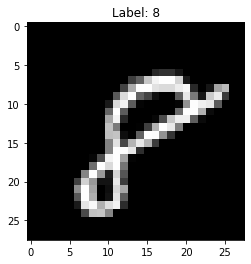

Predicted Number:	 9


In [27]:
# Prediction of the first image before training the model
print('Test prediction of the untrained model -- Train data')
plotImage(x_train, y_train, index=59999)
getModelPrediction(x_train[59999:60000], model)

In [28]:
# Training and optimizing the model (Stochastic Gradient Descent)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2999 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1470 - accuracy: 0.9555
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1081 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0753 - accuracy: 0.9758


Test prediction of the untrained model -- Train data


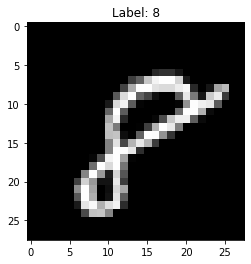

Predicted Number:	 8


In [29]:
# Prediction of the first image after training the model
print('Test prediction of the untrained model -- Train data')
plotImage(x_train, y_train, index=59999)
getModelPrediction(x_train[59999:60000], model)

In [34]:
# Evaluating the trained model
loss, acc = model.evaluate(x_test, y_test, verbose=1)
# Setting the model to give a probability as output
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

313/313 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9762


In [38]:
# Predictions on test data with trained model
print('Predictions of the trained model: ', end='')
predictions = np.array(probability_model(x_test)).tolist()
results = np.array([result.index(max(result)) for result in predictions], dtype=np.uint8)
print(results)
print('\nTest data labels: ', end='')
print(y_test)

Predictions of the trained model: [7 2 1 ... 4 5 6]

Test data labels: [7 2 1 ... 4 5 6]


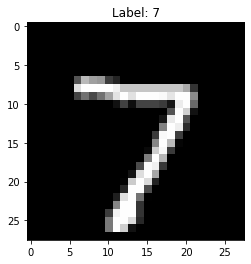

Predicted Number:	 7


In [32]:
plotImage(x_test, y_test, index=0)
getModelPrediction(x_test[0:1], model)